Importing necessary library

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Loading training data and concatinating

In [129]:

training_data = pd.read_csv('Data/training_data.csv')
training_data_target = pd.read_csv('Data/training_data_targets.csv')

training_data_target_shifted = training_data_target.shift(1)

training_data_target_shifted.rename(columns={'3.2': 'Price'}, inplace=True)

training_data_target_shifted.at[0, 'Price'] = 3.2

training_data_with_price=pd.concat([training_data,training_data_target_shifted],axis=1)

training_data_with_price.head()


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0,4.75
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.90
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,3.87


In [130]:
training_data_with_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5417 entries, 0 to 5416
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5417 non-null   object 
 1   Location           5417 non-null   object 
 2   Year               5417 non-null   int64  
 3   Kilometers_Driven  5417 non-null   int64  
 4   Fuel_Type          5417 non-null   object 
 5   Transmission       5417 non-null   object 
 6   Owner_Type         5417 non-null   object 
 7   Mileage            5416 non-null   object 
 8   Engine             5383 non-null   object 
 9   Power              5383 non-null   object 
 10  Seats              5379 non-null   float64
 11  Price              5416 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 508.0+ KB


In [131]:
training_data_with_price.describe()

,Year,Kilometers_Driven,Seats,Price
count,5417.000000,5.417000e+03,5379.000000,5416.00000
mean,2013.363670,5.882682e+04,5.280350,9.45440
std,3.283659,9.511826e+04,0.811459,11.16756
min,1998.000000,1.710000e+02,0.000000,0.44000
25%,2011.000000,3.400000e+04,5.000000,3.50000
50%,2014.000000,5.329300e+04,5.000000,5.65000
75%,2016.000000,7.300000e+04,5.000000,9.90000
max,2019.000000,6.500000e+06,10.000000,160.00000


In [132]:
training_data_with_price.shape

(5417, 12)

In [133]:
print(training_data_with_price['Location'].unique())
print(training_data_with_price['Fuel_Type'].unique())
print(training_data_with_price['Transmission'].unique())
print(training_data_with_price['Owner_Type'].unique())

['Delhi' 'Pune' 'Jaipur' 'Ahmedabad' 'Hyderabad' 'Mumbai' 'Bangalore'
 'Chennai' 'Kolkata' 'Kochi' 'Coimbatore']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Automatic' 'Manual']
['Second' 'First' 'Third' 'Fourth & Above']


In [134]:
training_data_with_price.head()


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,3.20
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,21.50
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0,4.75
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.90
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,3.87


In [135]:
training_data_with_price.isnull().sum()

Brand                 0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               34
Power                34
Seats                38
Price                 1
dtype: int64

Now drop all row with null values

In [136]:
print("Shape of train data Before dropping any Row: ",training_data_with_price.shape)
training_data_with_price = training_data_with_price[training_data_with_price['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",training_data_with_price.shape)
training_data_with_price = training_data_with_price[training_data_with_price['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",training_data_with_price.shape)
training_data_with_price = training_data_with_price[training_data_with_price['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",training_data_with_price.shape)
training_data_with_price = training_data_with_price[training_data_with_price['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",training_data_with_price.shape)
training_data_with_price = training_data_with_price[training_data_with_price['Price'].notna()]
print("Shape of train data After dropping Rows with NULL values in Price  : ",training_data_with_price.shape)

Shape of train data Before dropping any Row:  (5417, 12)
Shape of train data After dropping Rows with NULL values in Mileage:  (5416, 12)
Shape of train data After dropping Rows with NULL values in Engine :  (5382, 12)
Shape of train data After dropping Rows with NULL values in Power  :  (5382, 12)
Shape of train data After dropping Rows with NULL values in Seats  :  (5378, 12)
Shape of train data After dropping Rows with NULL values in Price  :  (5377, 12)


 I reset the index and droping the present index, because after using .notna() we have many absent indexes

In [137]:
training_data_with_price = training_data_with_price.reset_index(drop=True)

In [138]:
for i in range(training_data_with_price.shape[0]):
    training_data_with_price.at[i, 'Company'] = training_data_with_price['Brand'][i].split()[0]
    training_data_with_price.at[i, 'Mileage(km/kg)'] = training_data_with_price['Mileage'][i].split()[0]
    training_data_with_price.at[i, 'Engine(CC)'] = training_data_with_price['Engine'][i].split()[0]
    training_data_with_price.at[i, 'Power(bhp)'] = training_data_with_price['Power'][i].split()[0]
training_data_with_price['Mileage(km/kg)'] = training_data_with_price['Mileage(km/kg)'].astype(float)
training_data_with_price['Engine(CC)'] = training_data_with_price['Engine(CC)'].astype(float)
# training_data_with_price['Power(bhp)'] = training_data_with_price['Power(bhp)'].astype(float)

Now we check which power value is null 

In [139]:
indexes_method = training_data_with_price[training_data_with_price['Power(bhp)'] == 'null'].index.tolist()
print(indexes_method)


[181, 228, 247, 252, 271, 274, 311, 346, 416, 464, 473, 503, 514, 569, 613, 615, 680, 749, 801, 807, 893, 1000, 1076, 1080, 1092, 1100, 1187, 1361, 1395, 1531, 1570, 1586, 1642, 1699, 1748, 1785, 1794, 1835, 1886, 1904, 1946, 2017, 2073, 2111, 2114, 2129, 2263, 2314, 2402, 2477, 2482, 2545, 2648, 2740, 2932, 3015, 3029, 3031, 3132, 3281, 3283, 3327, 3334, 3413, 3443, 3451, 3465, 3509, 3619, 3703, 3745, 3842, 3898, 3907, 4020, 4039, 4173, 4240, 4297, 4335, 4345, 4352, 4383, 4397, 4402, 4548, 4764, 4799, 5118, 5127, 5198, 5258, 5261]


In [140]:
training_data_with_price.shape

(5377, 16)

In [141]:
training_data_with_price = training_data_with_price.drop(training_data_with_price.index[indexes_method])
training_data_with_price = training_data_with_price.reset_index(drop=True)

In [142]:
training_data_with_price.shape

(5284, 16)

Now we can convert datatype of power(bhp) str to float

In [143]:
training_data_with_price['Power(bhp)'] = training_data_with_price['Power(bhp)'].astype(float)

In [144]:
training_data_with_price.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Celerio VXI AMT,Delhi,2014,35214,Petrol,Automatic,Second,23.1 kmpl,998 CC,67.04 bhp,5.0,3.20,Maruti,23.10,998.0,67.04
1,Audi Q5 2.0 TDI,Delhi,2013,71000,Diesel,Automatic,First,14.16 kmpl,1968 CC,174.3 bhp,5.0,21.50,Audi,14.16,1968.0,174.30
2,Toyota Etios VXD,Pune,2012,111000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.1 bhp,5.0,4.75,Toyota,23.59,1364.0,67.10
3,Maruti Wagon R LXI CNG,Pune,2012,90400,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,2.90,Maruti,26.20,998.0,58.20
4,Maruti Wagon R AMT VXI,Jaipur,2016,68630,Petrol,Automatic,First,20.51 kmpl,998 CC,67 bhp,5.0,3.87,Maruti,20.51,998.0,67.00


Now,

we will delete all useless features

In [145]:
training_data_with_price.drop(["Brand"],axis=1,inplace=True)
training_data_with_price.drop(["Mileage"],axis=1,inplace=True)
training_data_with_price.drop(["Engine"],axis=1,inplace=True)
training_data_with_price.drop(["Power"],axis=1,inplace=True)

In [146]:
training_data_with_price.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Delhi,2014,35214,Petrol,Automatic,Second,5.0,3.20,Maruti,23.10,998.0,67.04
1,Delhi,2013,71000,Diesel,Automatic,First,5.0,21.50,Audi,14.16,1968.0,174.30
2,Pune,2012,111000,Diesel,Manual,First,5.0,4.75,Toyota,23.59,1364.0,67.10
3,Pune,2012,90400,CNG,Manual,First,5.0,2.90,Maruti,26.20,998.0,58.20
4,Jaipur,2016,68630,Petrol,Automatic,First,5.0,3.87,Maruti,20.51,998.0,67.00


Data visualization

In [147]:
training_data_with_price['Price'].describe()

count    5284.000000
mean        9.581334
std        11.233538
min         0.440000
25%         3.510000
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

let's look at target variable

(0.0, 160.0)

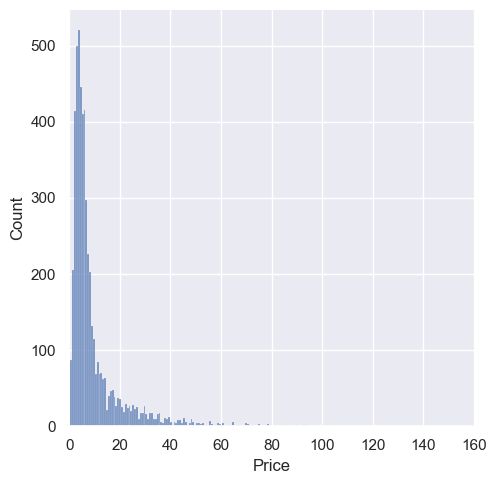

In [148]:

sns.displot(training_data_with_price['Price'])
plt.xlim([0,160])

Fuel type

In [149]:
training_data_with_price['Fuel_Type'].describe()

count       5284
unique         4
top       Diesel
freq        2828
Name: Fuel_Type, dtype: object

(-0.5, 3.5, 0.0, 165.0)

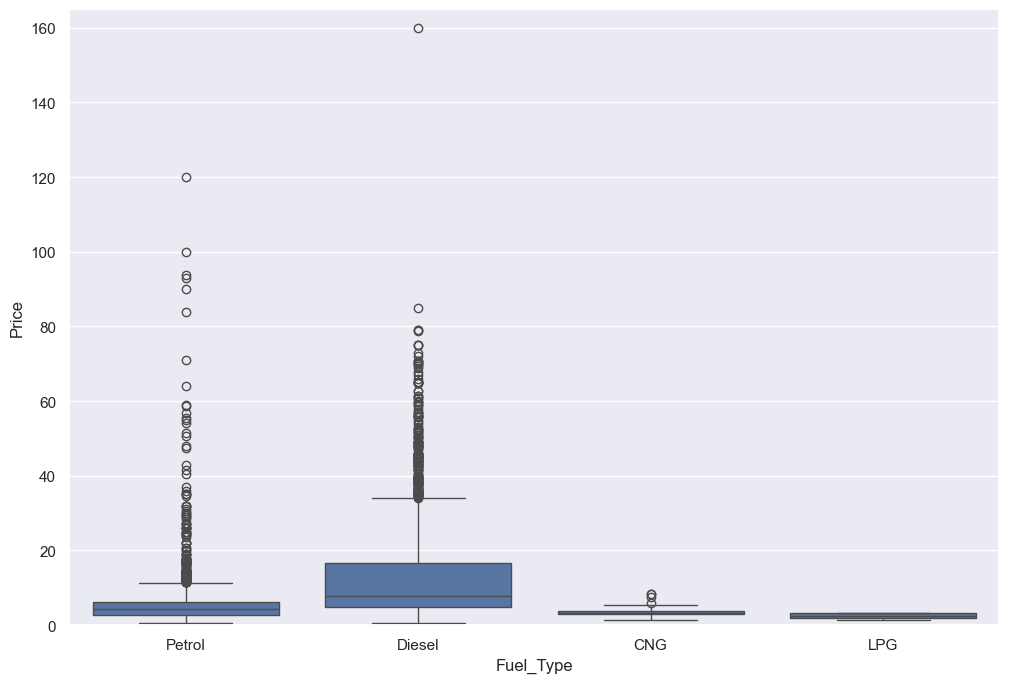

In [150]:
var = 'Fuel_Type'
data = pd.concat([training_data_with_price['Price'], training_data_with_price[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165)

Year

<Axes: xlabel='Year', ylabel='Price'>

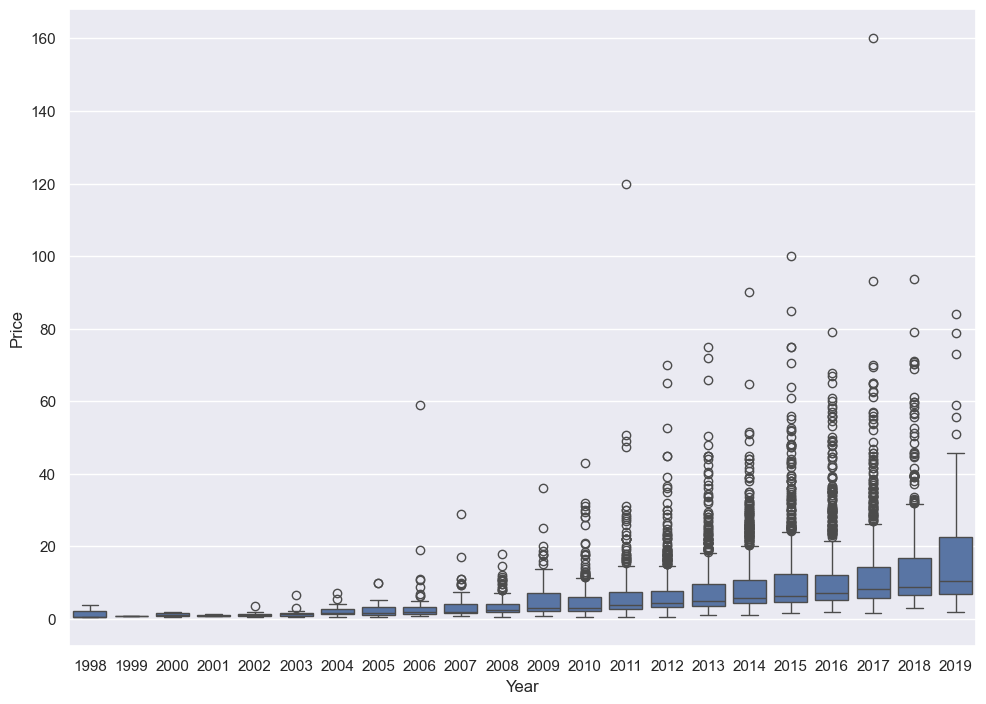

In [151]:
var = 'Year'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x = var, y ='Price', data = training_data_with_price) 

Clearly we see that price of newest car is high

Owner type

<Axes: xlabel='Owner_Type', ylabel='Price'>

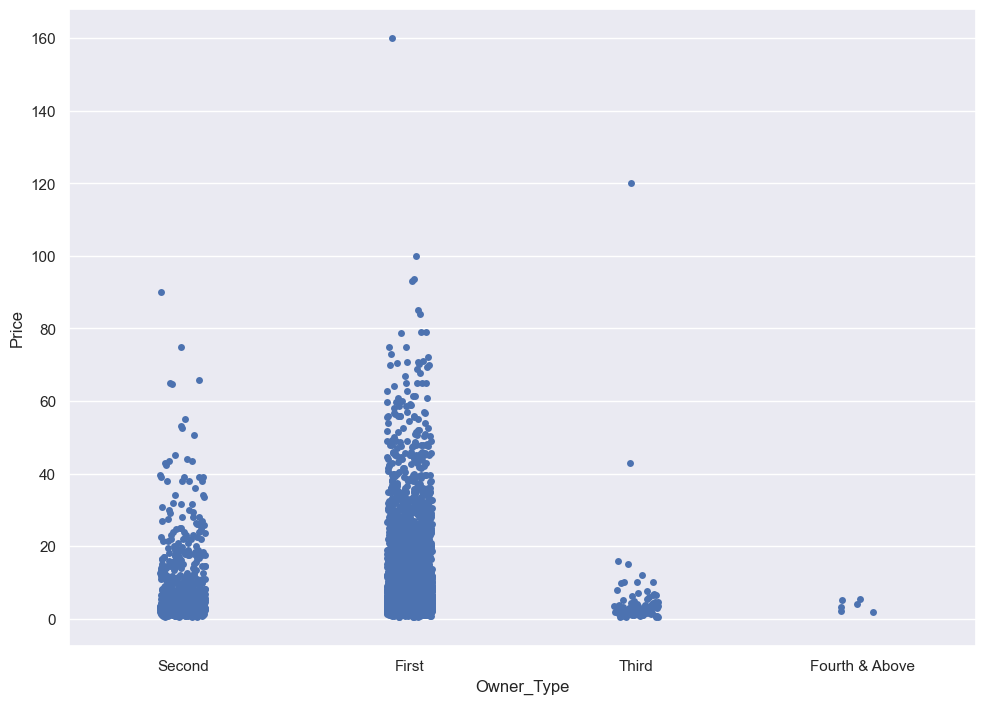

In [152]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = training_data_with_price) 

Company

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'Toyota'),
  Text(3, 0, 'Hyundai'),
  Text(4, 0, 'Mahindra'),
  Text(5, 0, 'BMW'),
  Text(6, 0, 'Honda'),
  Text(7, 0, 'Chevrolet'),
  Text(8, 0, 'Mercedes-Benz'),
  Text(9, 0, 'Tata'),
  Text(10, 0, 'Jaguar'),
  Text(11, 0, 'Skoda'),
  Text(12, 0, 'Mitsubishi'),
  Text(13, 0, 'Ford'),
  Text(14, 0, 'Renault'),
  Text(15, 0, 'Volkswagen'),
  Text(16, 0, 'Datsun'),
  Text(17, 0, 'Nissan'),
  Text(18, 0, 'Land'),
  Text(19, 0, 'Porsche'),
  Text(20, 0, 'Volvo'),
  Text(21, 0, 'Fiat'),
  Text(22, 0, 'Jeep'),
  Text(23, 0, 'Mini'),
  Text(24, 0, 'Force'),
  Text(25, 0, 'Bentley'),
  Text(26, 0, 'ISUZU'),
  Text(27, 0, 'Isuzu'),
  Text(28, 0, 'Lamborghini')])

<Figure size 2000x1000 with 0 Axes>

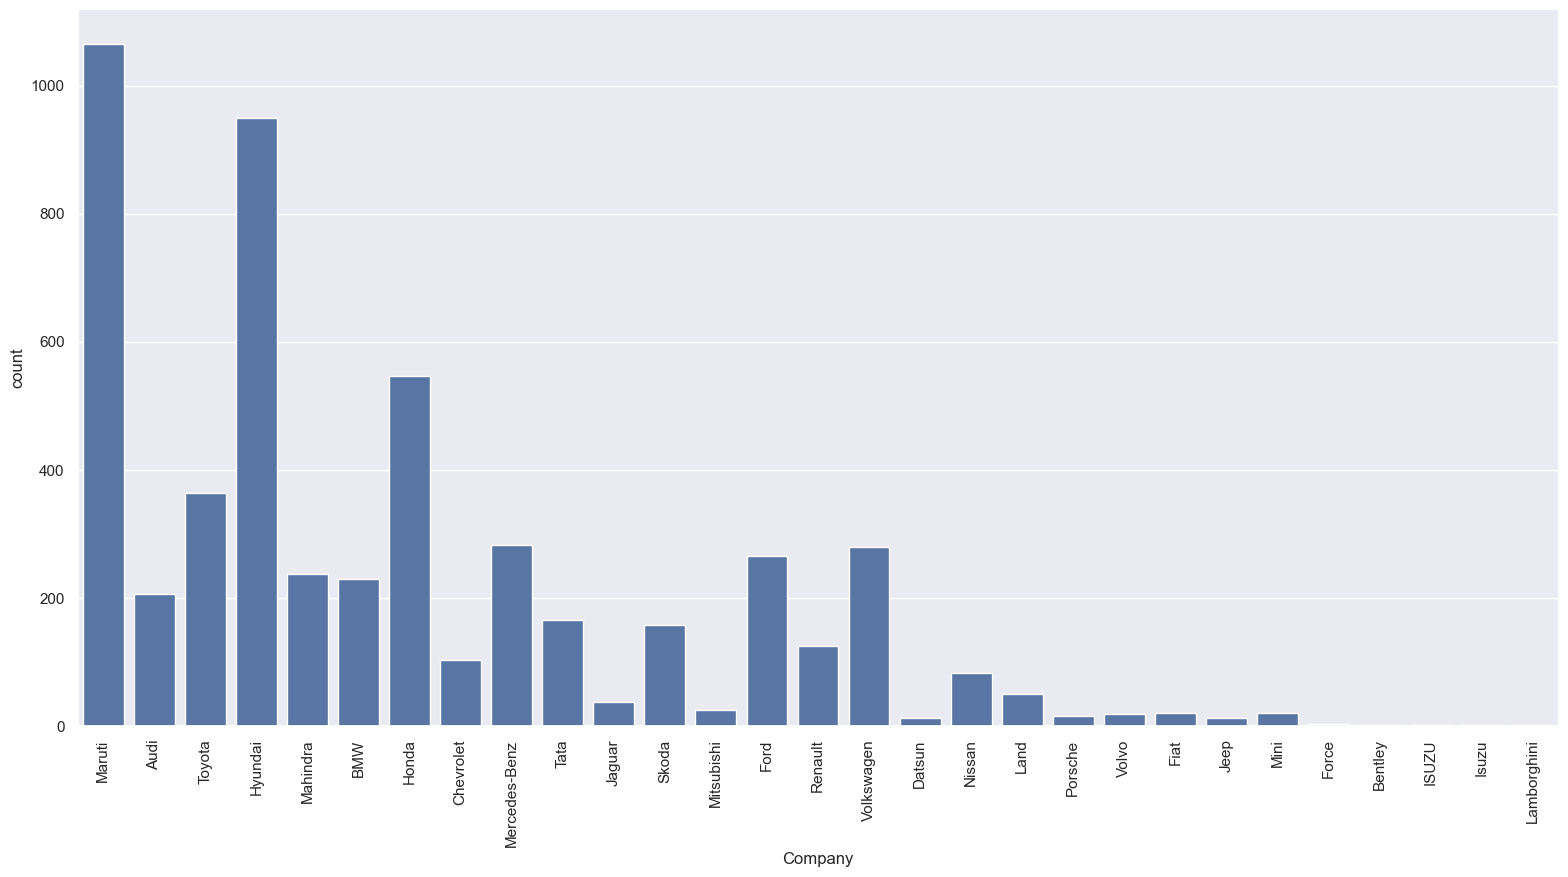

In [153]:
var = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", height=8, aspect=2, data=training_data_with_price)
plt.xticks(rotation=90)

Handling categorical data

In [154]:
var = 'Location'
training_data_with_price[var].value_counts()

Location
Mumbai        693
Hyderabad     646
Coimbatore    572
Kochi         569
Pune          543
Delhi         503
Kolkata       462
Chennai       423
Jaipur        357
Bangalore     322
Ahmedabad     194
Name: count, dtype: int64

Now from above we see that mumbai have more number of cars

<function matplotlib.pyplot.show(close=None, block=None)>

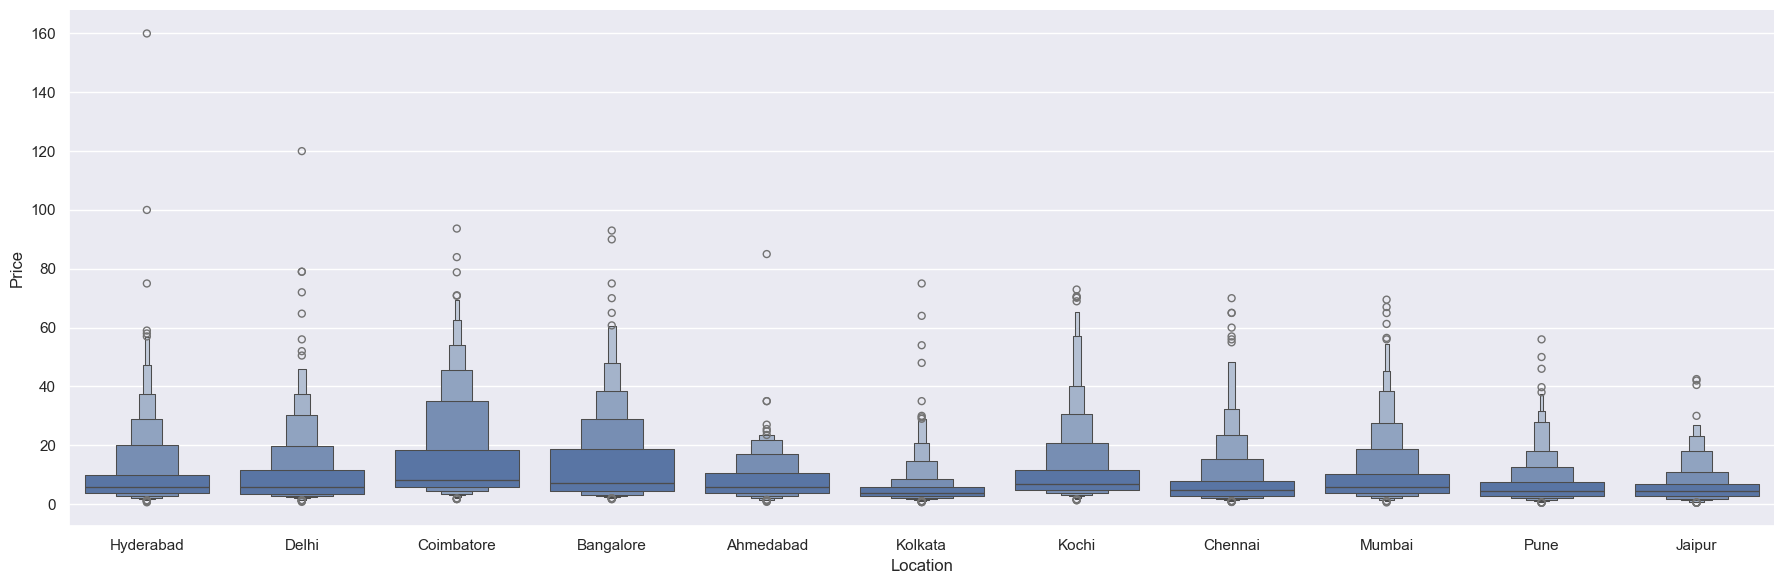

In [155]:
sns.catplot(y='Price',x=var,data= training_data_with_price.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

We will be using One-hot-encoding here

In [156]:
Location = training_data_with_price[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False


Fuel type

In [157]:
var = 'Fuel_Type'
training_data_with_price[var].value_counts()

Fuel_Type
Diesel    2828
Petrol    2399
CNG         48
LPG          9
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

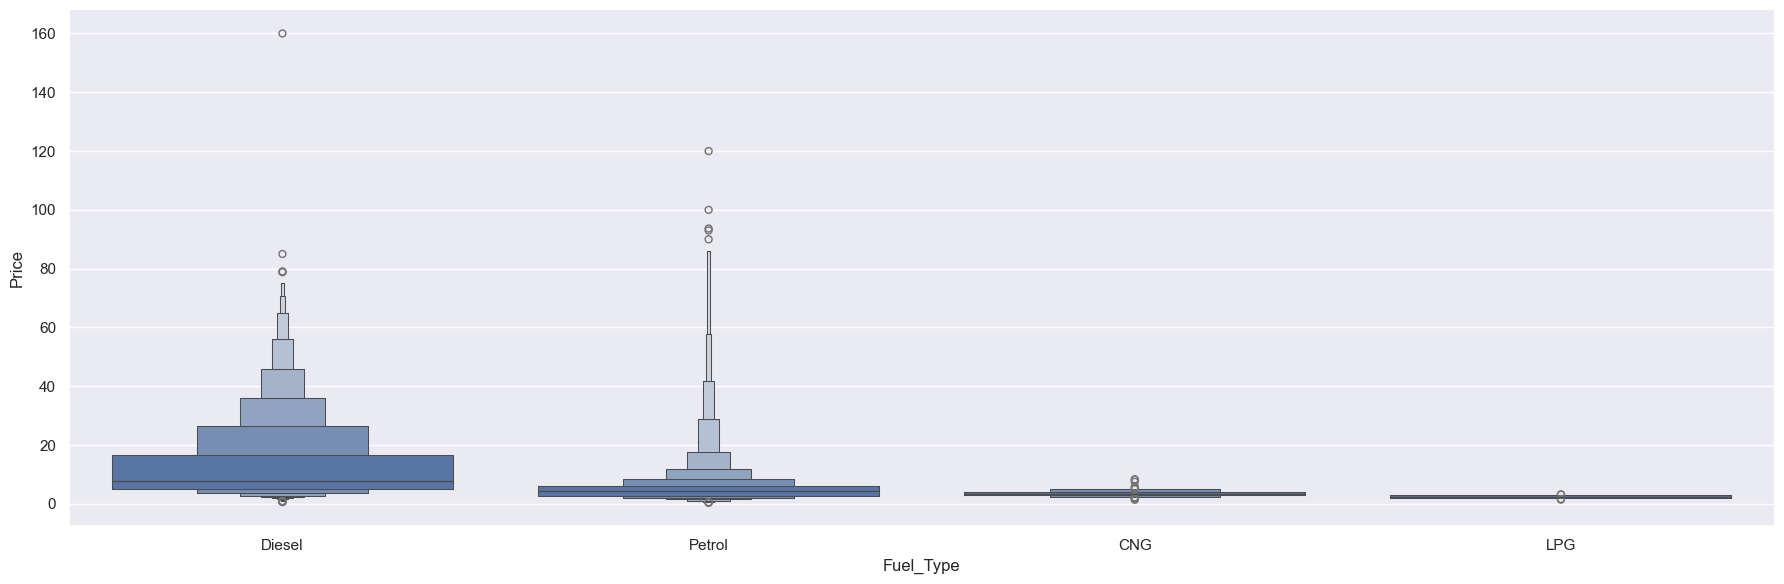

In [158]:
sns.catplot(y='Price',x=var,data= training_data_with_price.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [159]:
Fuel_t = training_data_with_price[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,False,False,True
1,True,False,False
2,True,False,False
3,False,False,False
4,False,False,True


Working with Transmission

In [160]:
var = 'Transmission'
training_data_with_price[var].value_counts()

Transmission
Manual       3772
Automatic    1512
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

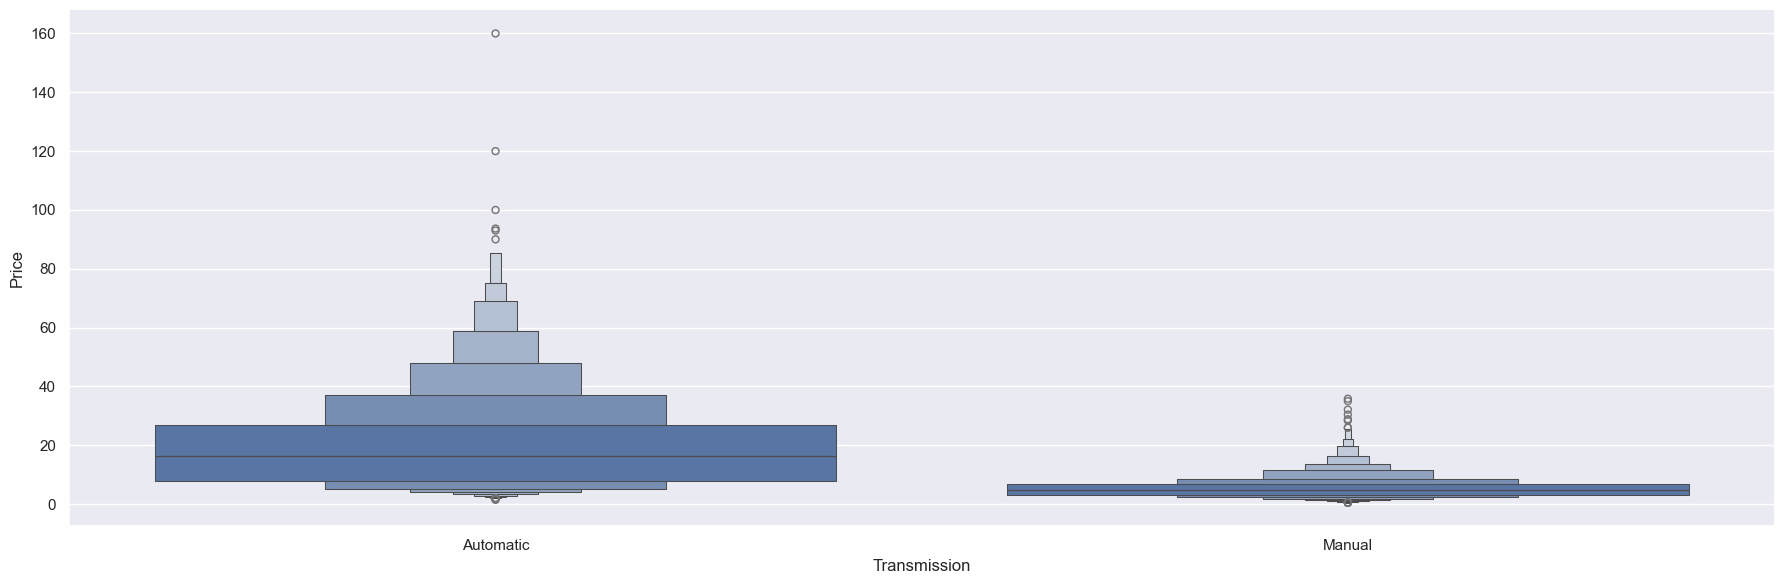

In [161]:
sns.catplot(y='Price',x=var,data= training_data_with_price.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

there is no order so one hot encoding

In [162]:
Transmission = training_data_with_price[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,False
1,False
2,True
3,True
4,False


Now owner type

In [163]:
var = 'Owner_Type'
training_data_with_price[var].value_counts()

Owner_Type
First             4349
Second             837
Third               92
Fourth & Above       6
Name: count, dtype: int64

Here we do label-encoding due to ordered data(owner_type)

In [164]:
training_data_with_price.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
training_data_with_price.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Delhi,2014,35214,Petrol,Automatic,2,5.0,3.20,Maruti,23.10,998.0,67.04
1,Delhi,2013,71000,Diesel,Automatic,1,5.0,21.50,Audi,14.16,1968.0,174.30
2,Pune,2012,111000,Diesel,Manual,1,5.0,4.75,Toyota,23.59,1364.0,67.10
3,Pune,2012,90400,CNG,Manual,1,5.0,2.90,Maruti,26.20,998.0,58.20
4,Jaipur,2016,68630,Petrol,Automatic,1,5.0,3.87,Maruti,20.51,998.0,67.00


Now its time for company feature

In [165]:
var ='Company'
training_data_with_price[var].value_counts()

Company
Maruti           1065
Hyundai           950
Honda             546
Toyota            364
Mercedes-Benz     283
Volkswagen        280
Ford              265
Mahindra          238
BMW               230
Audi              207
Tata              166
Skoda             158
Renault           125
Chevrolet         103
Nissan             83
Land               50
Jaguar             37
Mitsubishi         25
Fiat               21
Mini               21
Volvo              19
Porsche            16
Datsun             12
Jeep               12
Force               3
ISUZU               2
Bentley             1
Isuzu               1
Lamborghini         1
Name: count, dtype: int64

There are so much variation so we will drop this feature

In [166]:
training_data_with_price.drop(["Company"],axis=1,inplace=True)

In [167]:
training_data_with_price.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp)
0,Delhi,2014,35214,Petrol,Automatic,2,5.0,3.20,23.10,998.0,67.04
1,Delhi,2013,71000,Diesel,Automatic,1,5.0,21.50,14.16,1968.0,174.30
2,Pune,2012,111000,Diesel,Manual,1,5.0,4.75,23.59,1364.0,67.10
3,Pune,2012,90400,CNG,Manual,1,5.0,2.90,26.20,998.0,58.20
4,Jaipur,2016,68630,Petrol,Automatic,1,5.0,3.87,20.51,998.0,67.00


In [168]:
train_data= pd.concat([training_data_with_price,Location,Fuel_t,Transmission],axis=1)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Delhi,2014,35214,Petrol,Automatic,2,5.0,3.20,23.10,998.0,...,False,False,False,False,False,False,False,False,True,False
1,Delhi,2013,71000,Diesel,Automatic,1,5.0,21.50,14.16,1968.0,...,False,False,False,False,False,False,True,False,False,False
2,Pune,2012,111000,Diesel,Manual,1,5.0,4.75,23.59,1364.0,...,False,False,False,False,False,True,True,False,False,True
3,Pune,2012,90400,CNG,Manual,1,5.0,2.90,26.20,998.0,...,False,False,False,False,False,True,False,False,False,True
4,Jaipur,2016,68630,Petrol,Automatic,1,5.0,3.87,20.51,998.0,...,False,True,False,False,False,False,False,False,True,False


In [169]:
train_data.replace({True:1,False:0},inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Delhi,2014,35214,Petrol,Automatic,2,5.0,3.20,23.10,998.0,...,0,0,0,0,0,0,0,0,1,0
1,Delhi,2013,71000,Diesel,Automatic,1,5.0,21.50,14.16,1968.0,...,0,0,0,0,0,0,1,0,0,0
2,Pune,2012,111000,Diesel,Manual,1,5.0,4.75,23.59,1364.0,...,0,0,0,0,0,1,1,0,0,1
3,Pune,2012,90400,CNG,Manual,1,5.0,2.90,26.20,998.0,...,0,0,0,0,0,1,0,0,0,1
4,Jaipur,2016,68630,Petrol,Automatic,1,5.0,3.87,20.51,998.0,...,0,1,0,0,0,0,0,0,1,0


In [170]:
train_data.drop(["Location","Fuel_Type","Transmission"],axis=1,inplace=True)
train_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2014,35214,2,5.0,3.20,23.10,998.0,67.04,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013,71000,1,5.0,21.50,14.16,1968.0,174.30,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2012,111000,1,5.0,4.75,23.59,1364.0,67.10,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2012,90400,1,5.0,2.90,26.20,998.0,58.20,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2016,68630,1,5.0,3.87,20.51,998.0,67.00,0,0,...,0,1,0,0,0,0,0,0,1,0


In [171]:
train_data.shape

(5284, 22)

Now we prepare test data

In [172]:
test_data=pd.read_csv('Data/test_data.csv')
test_data.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Swift Dzire VDI,Hyderabad,2013,69000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0
1,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.4 kmpl,1997 CC,120 bhp,7.0
2,Mahindra XUV500 W8 2WD,Delhi,2014,86000,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0
3,Tata Indigo CS eVX,Pune,2016,52000,Diesel,Manual,Second,25.0 kmpl,1396 CC,69.01 bhp,5.0
4,Hyundai Santro GLS II - Euro II,Pune,2009,100000,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN


In [173]:



print("Shape of test data Before dropping any Row: ",train_data.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test_data.shape)
print('Droping null done')

test_data = test_data.reset_index(drop=True)
print('Index reset done')

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
print('Split Done') 

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('casting 1 Done') 

position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)
        
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('casting 2 Done') 

test_data.drop(["Brand"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)

var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)

Shape of test data Before dropping any Row:  (5284, 22)
Shape of test data After dropping Rows with NULL values in Mileage:  (601, 11)
Shape of test data After dropping Rows with NULL values in Engine :  (599, 11)
Shape of test data After dropping Rows with NULL values in Power  :  (599, 11)
Shape of test data After dropping Rows with NULL values in Seats  :  (597, 11)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (587, 21)


In [174]:
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2013,69000,1,5.0,23.4,1248.0,74.00,False,False,False,...,True,False,False,False,False,False,True,False,False,True
1,2017,26741,1,7.0,15.4,1997.0,120.00,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,2014,86000,1,7.0,15.1,2179.0,140.00,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,2016,52000,2,5.0,25.0,1396.0,69.01,False,False,False,...,False,False,False,False,False,True,True,False,False,True
4,2008,125000,3,5.0,11.7,2354.0,177.60,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [175]:
final_test.replace({False:0,True:1},inplace=True)
final_test.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2013,69000,1,5.0,23.4,1248.0,74.00,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,2017,26741,1,7.0,15.4,1997.0,120.00,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,2014,86000,1,7.0,15.1,2179.0,140.00,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2016,52000,2,5.0,25.0,1396.0,69.01,0,0,0,...,0,0,0,0,0,1,1,0,0,1
4,2008,125000,3,5.0,11.7,2354.0,177.60,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Selection of features

In [176]:
X = train_data.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5284, 21)

In [177]:
y = train_data.loc[:,['Price']]
y.head()

,Price
0,3.20
1,21.50
2,4.75
3,2.90
4,3.87


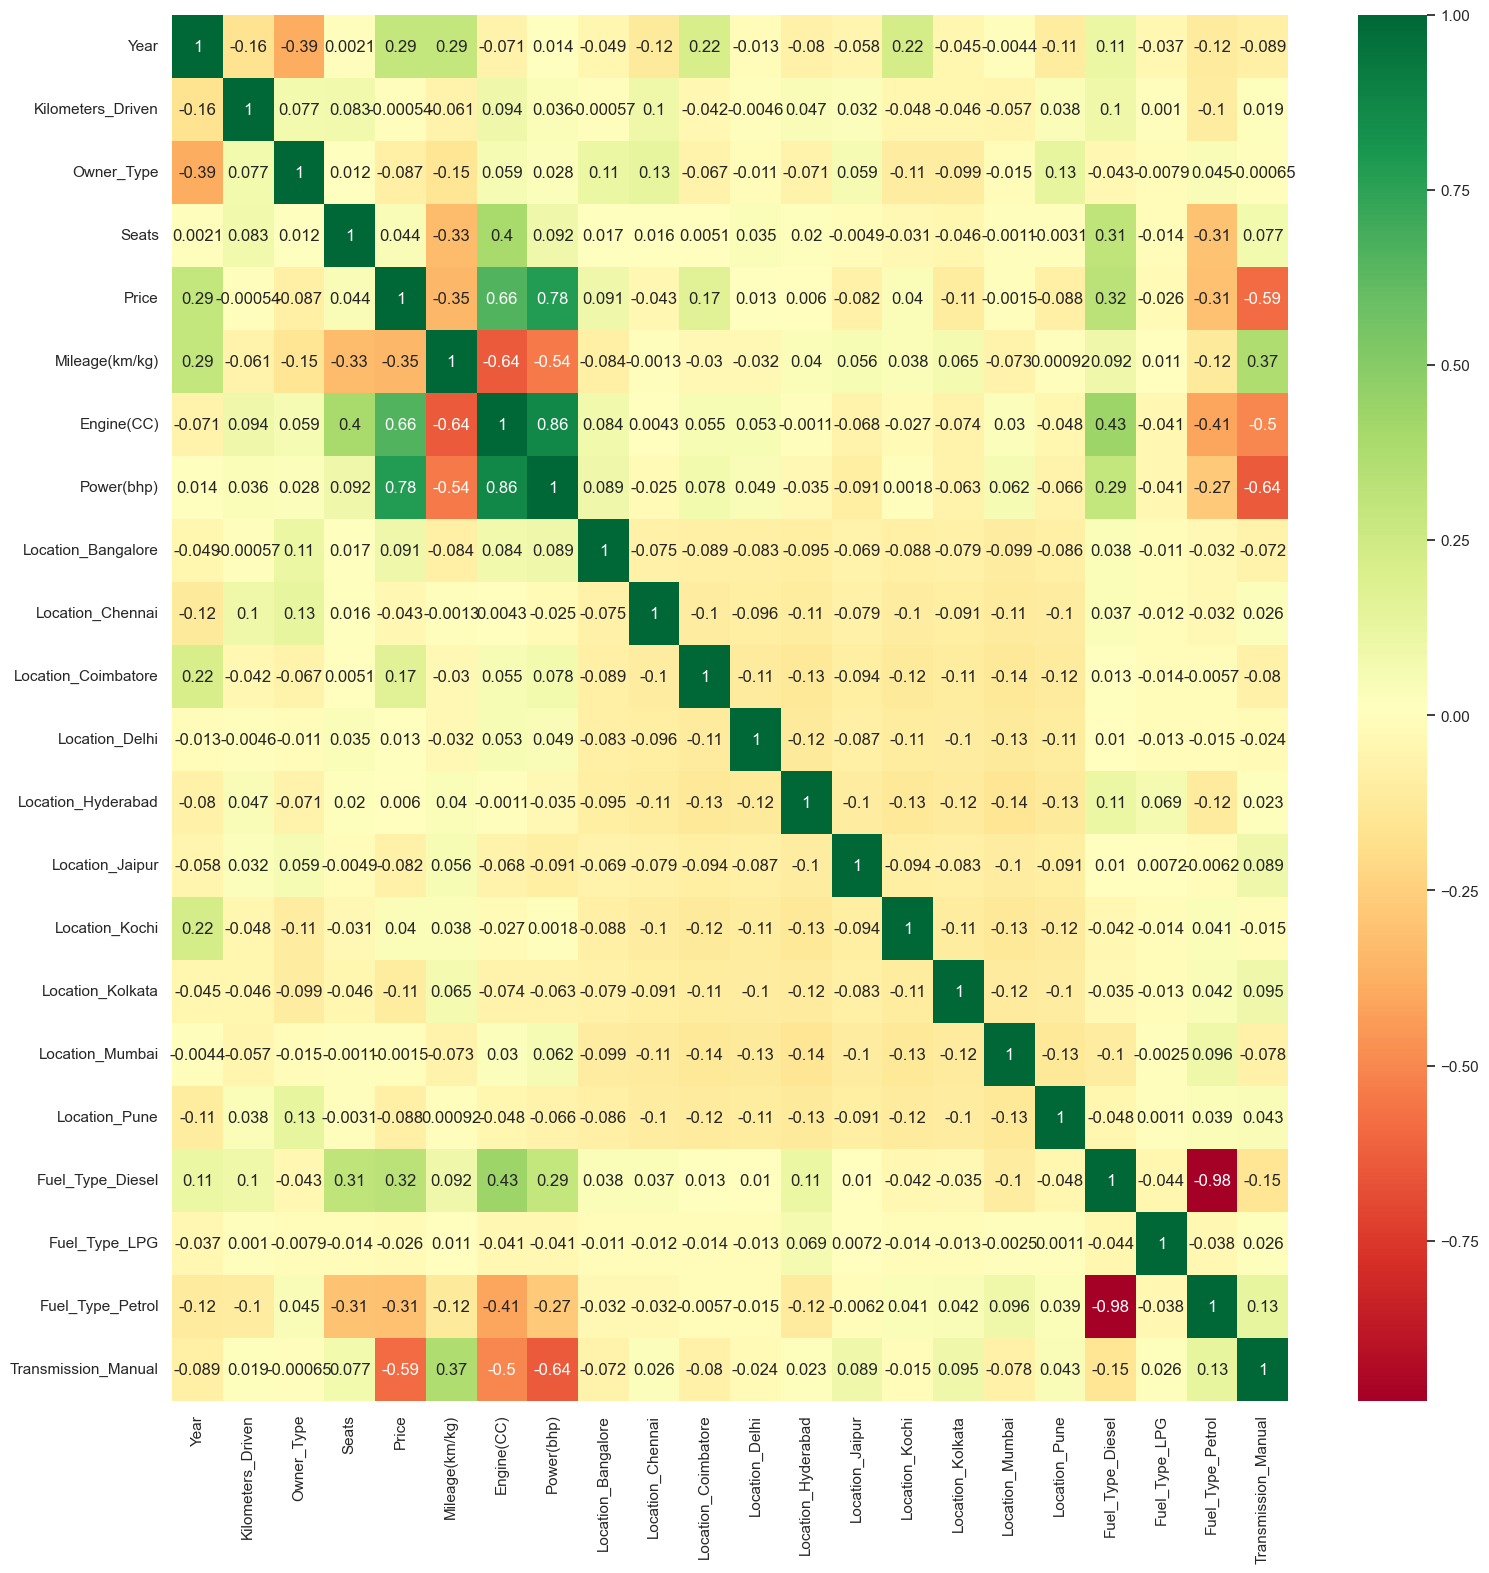

In [178]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [179]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

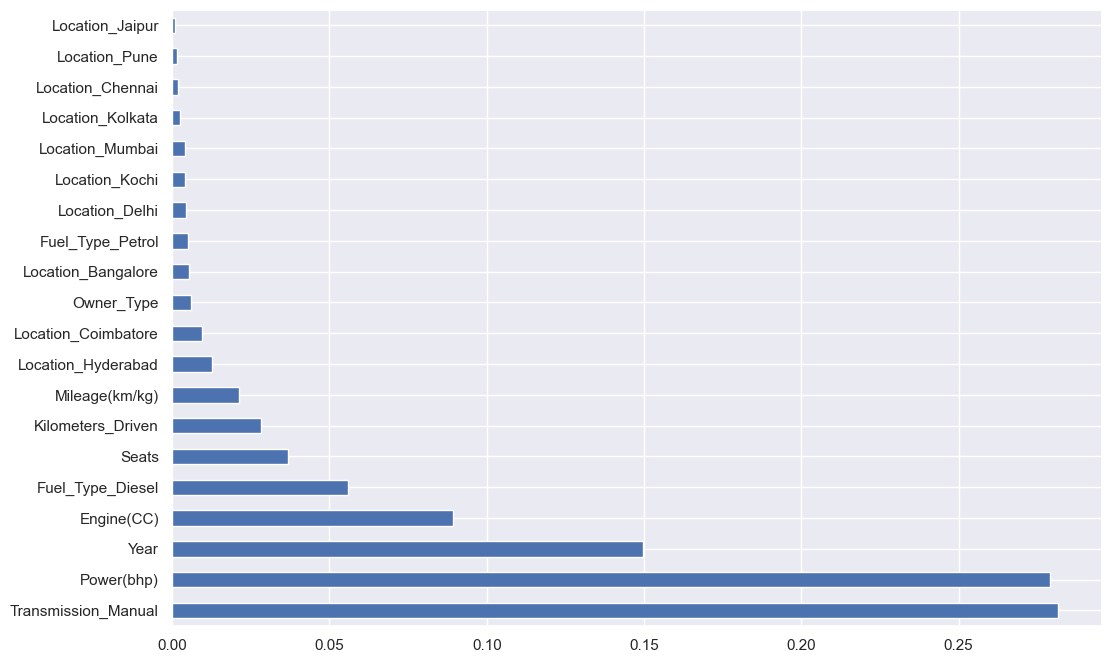

In [180]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Now we use built in model

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

 Linear Regression

In [182]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred1= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7226657387516233
Accuracy on Testing set:  0.6580916532160412


Random Forest Regressor

In [183]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred2= rf_reg.predict(X_test)
print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

c:\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy on Training set:  0.9861800220546085
Accuracy on Testing set:  0.8154512744909691


Gradient boosting regressor

In [184]:
# GradientBoostingRegressor

from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=42)

# Fitting the data
grad_reg.fit(X_train, y_train)

# Checking the score
print('Training Score: ', grad_reg.score(X_train, y_train))
print('Testing Score: ', grad_reg.score(X_test, y_test))

c:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score:  0.9596634519148445
Testing Score:  0.8214567805785213


In [185]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table for linear regression model")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred1))
print("\t\tError Table for random forest regression model")

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred2))

		Error Table for linear regression model
Mean Absolute Error      :  3.623406831310538
Mean Squared  Error      :  42.38814669960197
Root Mean Squared  Error :  6.510617996749769
R Squared Error          :  0.6580916532160412
		Error Table for random forest regression model
Mean Absolute Error      :  1.6238442573320722
Mean Squared  Error      :  22.879460310585177
Root Mean Squared  Error :  4.783247883037756
R Squared Error          :  0.8154512744909691


Let's try on given test dataset since random forest regressor have best score so we predict target varible for test dataset

In [186]:


Y_predict = rf_reg.predict(final_test)

predictions_df = pd.DataFrame({'Predicted_Target': Y_predict}).round(2)
predictions_df.head()
predictions_df.to_csv('Data/predictions.csv',index=False)

